In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans

from src.freq_variavel import gerar_freq_variavel
from src.leadscore_profile import (
    gerar_leadscore_profile, 
    calcular_pesos_por_variavel
)
from src.score_map import gerar_score_map
from src.leadscore_final import (
    calcular_leadscore_total, 
    detalhar_score_por_variavel, 
    calcular_score_total_ponderado
)
from src.leadscore_plot import (
    plot_distribuicao_barra,
    plot_histograma_leadscore_alunos
)
from src.perfis_clusters import exibir_perfis_clusters

df_pesquisa_alunos_lancamentos = pd.read_csv(r"C:\Users\Camilo_Bica\data_science\consultoria\portal_vhe\dados\pesquisa_alunos_lancamentos.csv")

df_pesquisa_alunos_lancamentos.head()

,data_inscricao,email,data_nascimento,genero,faixa_etaria,escolaridade_categoria,renda_media,como_comprou_portal,tempo_antes_portal,onde_acompanha_conteudo,nivel_idioma,interesse_renovacao_portal,lancamentos,problema_aprender_categoria,profissao_categoria,fala_outro_idioma_categoria,motivo_fluencia_espanhol_categoria,pais_categoria,estado_categoria
0,2024-05-14,teofilotavares@icloud.com,1983-01-06,Masculino,35 - 44,Pós-graduação completa,Mais de 10.000,Comprei com o meu próprio dinheiro,Entre 1 e 3 meses,YouTube,Iniciante,0.0,L3-24,Falta de tempo,Saúde,Não Fala Outro Idioma,Quero viajar e viver experiências marcantes me...,Brasil,GO
1,2024-05-16,leosantanati@outlook.com,1995-07-16,Masculino,25 - 34,Médio completo,De 2.500 a 5.000,Comprei com o meu próprio dinheiro,Evento Gratuito,YouTube,Iniciante,0.0,L3-24,Falta de disciplina / foco,Empreendedorismo,Não Fala Outro Idioma,Morar no exterior,Brasil,SP
2,2024-05-16,flaviojatoba@outlook.com,1992-10-28,Masculino,25 - 34,Superior completo,De 2.500 a 5.000,Comprei com o meu próprio dinheiro,Evento Gratuito,Não acompanhava,Iniciante,0.0,L3-24,Falta de disciplina / foco,Publicidade,Não Fala Outro Idioma,Morar no exterior,Brasil,SP
3,2024-05-17,alandematos10@hotmail.com,1982-05-08,Masculino,35 - 44,Superior completo,De 1.500 a 2.500,Comprei com o meu próprio dinheiro,Evento Gratuito,YouTube,Iniciante,1.0,L3-24,Não sei por onde começar,Saúde,Não Fala Outro Idioma,Outros,Brasil,MG
4,2024-05-17,vanessavirginia2019@gmail.com,1985-06-08,Feminino,35 - 44,Superior completo,Não tenho renda.,Ganhei de presente,Entre 1 e 3 meses,YouTube,Iniciante,1.0,L3-24,Não sei por onde começar,Vendas,Não Fala Outro Idioma,Morar no exterior,Espanha,Estrangeiro


In [2]:
df_pesquisa_alunos_lancamentos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585 entries, 0 to 584
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   data_inscricao                      585 non-null    object 
 1   email                               585 non-null    object 
 2   data_nascimento                     585 non-null    object 
 3   genero                              585 non-null    object 
 4   faixa_etaria                        585 non-null    object 
 5   escolaridade_categoria              585 non-null    object 
 6   renda_media                         585 non-null    object 
 7   como_comprou_portal                 585 non-null    object 
 8   tempo_antes_portal                  585 non-null    object 
 9   onde_acompanha_conteudo             585 non-null    object 
 10  nivel_idioma                        585 non-null    object 
 11  interesse_renovacao_portal          552 non-n

In [3]:
cols_to_analyze = [
    "genero", "faixa_etaria", "escolaridade_categoria", "renda_media", "profissao_categoria",
    "onde_acompanha_conteudo", "nivel_idioma", "fala_outro_idioma_categoria", 
    "motivo_fluencia_espanhol_categoria", "problema_aprender_categoria"
]

clean_profile_df = gerar_freq_variavel(df_pesquisa_alunos_lancamentos, cols_to_analyze)
display(clean_profile_df)

,variavel,categoria,percentual (%)
7,escolaridade_categoria,Pós-graduação completa,40.9
8,escolaridade_categoria,Superior completo,29.6
9,escolaridade_categoria,Médio completo,14.5
10,escolaridade_categoria,Superior incompleto,12.5
2,faixa_etaria,25 - 34,31.5
3,faixa_etaria,35 - 44,28.4
4,faixa_etaria,44 - 55,21.4
5,faixa_etaria,+55,11.6
6,faixa_etaria,18 - 24,7.0
30,fala_outro_idioma_categoria,Não Fala Outro Idioma,67.9


In [4]:
# 1. Dicionário de pesos brutos para renda e escolaridade
renda_pesos_brutos = {
    "Não tenho renda.": 0,
    "Até 1.500": 1,
    "De 1.500 a 2.500": 2,
    "De 2.500 a 5.000": 4,
    "De 5.000 a 10.000": 7,
    "Mais de 10.000": 10
}

escolaridade_pesos_brutos = {
    "Fundamental completo": 0,
    "Médio incompleto": 1,
    "Médio completo": 2,
    "Superior incompleto": 4,
    "Superior completo": 7,
    "Pós-graduação completa": 10
}

# 2. Gerar leadscore com pesos manuais para cada variável
leadscore_renda = gerar_leadscore_profile(
    df_pesquisa_alunos_lancamentos,
    cols_to_analyze,
    variavel_com_pesos="renda_media",
    pesos_manualmente_definidos=renda_pesos_brutos
)

leadscore_escolaridade = gerar_leadscore_profile(
    df_pesquisa_alunos_lancamentos,
    cols_to_analyze,
    variavel_com_pesos="escolaridade_categoria",
    pesos_manualmente_definidos=escolaridade_pesos_brutos
)

# 3. Concatenar os dois leadscore_df
leadscore_df = pd.concat([leadscore_renda, leadscore_escolaridade], axis=0)

# 4. Calcular pesos automáticos (outros) + forçar peso fixo para renda e escolaridade
peso_variavel = calcular_pesos_por_variavel(leadscore_df)
peso_variavel["renda_media"] = 2.0
peso_variavel["escolaridade_categoria"] = 2.0

# 5. Visualizar os pesos finais
df_pesos = pd.DataFrame.from_dict(peso_variavel, orient="index", columns=["peso_calculado"]).reset_index()
df_pesos = df_pesos.rename(columns={"index": "variavel"}).sort_values(by="peso_calculado", ascending=False)
display(df_pesos)

,variavel,peso_calculado
0,escolaridade_categoria,2.00
9,renda_media,2.00
2,fala_outro_idioma_categoria,1.50
3,genero,1.44
5,nivel_idioma,1.31
6,onde_acompanha_conteudo,1.16
1,faixa_etaria,0.85
4,motivo_fluencia_espanhol_categoria,0.84
7,problema_aprender_categoria,0.76
8,profissao_categoria,0.50


In [5]:
# Visualizar score_base por variável e categoria
leadscore_df_sorted = leadscore_df.sort_values(by=["variavel", "score"], ascending=[True, False])
leadscore_df_sorted = leadscore_df_sorted.drop_duplicates(subset=["variavel", "categoria"])

# Mostrar como está a distribuição de score_base por variável
pd.set_option('display.max_rows', None) 
display(leadscore_df_sorted[["variavel", "categoria", "percentual (%)", "score"]])

,variavel,categoria,percentual (%),score
91,escolaridade_categoria,Pós-graduação completa,40.850000,417
9,escolaridade_categoria,Superior completo,29.572650,296
89,escolaridade_categoria,Superior incompleto,12.480000,167
10,escolaridade_categoria,Médio completo,14.529915,145
87,escolaridade_categoria,Médio incompleto,2.050000,42
13,escolaridade_categoria,Fundamental completo,0.512821,5
2,faixa_etaria,25 - 34,31.452991,315
3,faixa_etaria,35 - 44,28.376068,284
4,faixa_etaria,44 - 55,21.367521,214
5,faixa_etaria,+55,11.623932,116


In [6]:
score_map = gerar_score_map(leadscore_df, df_pesquisa_alunos_lancamentos)

df_pesquisa_alunos_lancamentos["leadscore_total"] = calcular_leadscore_total(
    df_pesquisa_alunos_lancamentos, score_map, peso_variavel
)

# Exibir os detalhes de um lead
detalhes = detalhar_score_por_variavel(df_pesquisa_alunos_lancamentos, 55, score_map, peso_variavel)
display(detalhes)

# Conferir total
print("Score total calculado:", detalhes["score_final"].sum())
print("Score total na base   :", df_pesquisa_alunos_lancamentos.loc[55, "leadscore_total"])

,variavel,resposta,score_base,peso,score_final
6,fala_outro_idioma_categoria,Não Fala Outro Idioma,679,1.50,1018
2,escolaridade_categoria,Superior completo,292,2.00,584
9,renda_media,De 2.500 a 5.000,277,2.00,554
0,genero,Masculino,287,1.44,413
1,faixa_etaria,25 - 34,315,0.85,268
5,nivel_idioma,Perdido,174,1.31,228
4,onde_acompanha_conteudo,Não acompanhava,178,1.16,206
7,motivo_fluencia_espanhol_categoria,Conquistar um emprego melhor e ganhar mais,244,0.84,205
8,problema_aprender_categoria,Falta de disciplina / foco,166,0.76,126
3,profissao_categoria,Administrativo,198,0.50,99


Score total calculado: 3701
Score total na base   : 3702


In [7]:
# Recalcular e aplicar
df_pesquisa_alunos_lancamentos["leadscore_total"] = df_pesquisa_alunos_lancamentos.apply(
    lambda row: calcular_score_total_ponderado(row, score_map, peso_variavel),
    axis=1
)

# Verificar
print("Valores únicos:", df_pesquisa_alunos_lancamentos["leadscore_total"].nunique())
print("Score mínimo:", df_pesquisa_alunos_lancamentos["leadscore_total"].min())
print("Score máximo:", df_pesquisa_alunos_lancamentos["leadscore_total"].max())
print("Top 5 scores mais comuns:")
print(df_pesquisa_alunos_lancamentos["leadscore_total"].value_counts().head())

Valores únicos: 524
Score mínimo: 1456
Score máximo: 5519
Top 5 scores mais comuns:
leadscore_total
3443    4
4187    4
4429    4
3861    3
4182    3
Name: count, dtype: int64


In [8]:
# Calcular a média de score dos compradores reais
media_compradores = df_pesquisa_alunos_lancamentos["leadscore_total"].mean()

# Limiares baseados na média
limite_a = media_compradores * 1.10
limite_b = media_compradores * 0.90
limite_c = media_compradores * 0.70
limite_d = media_compradores * 0.50

print("Média dos scores:", round(media_compradores))
print("Limite A (>= 110%):", round(limite_a))
print("Limite B (>= 90%):", round(limite_b))
print("Limite C (>= 70%):", round(limite_c))
print("Limite D (>= 50%):", round(limite_d))

# Função de classificação com base na média
def classificar_faixa_por_media(score):
    if score >= limite_a:
        return "A"
    elif score >= limite_b:
        return "B"
    elif score >= limite_c:
        return "C"
    else:
        return "D"

# Aplicar na base
df_pesquisa_alunos_lancamentos["leadscore_faixa"] = df_pesquisa_alunos_lancamentos["leadscore_total"].apply(classificar_faixa_por_media)

# Verificar a nova distribuição
print("\nDistribuição com base na média do comprador:")
print(df_pesquisa_alunos_lancamentos["leadscore_faixa"].value_counts())

Média dos scores: 4201
Limite A (>= 110%): 4621
Limite B (>= 90%): 3781
Limite C (>= 70%): 2941
Limite D (>= 50%): 2100

Distribuição com base na média do comprador:
leadscore_faixa
B    289
A    154
C    128
D     14
Name: count, dtype: int64


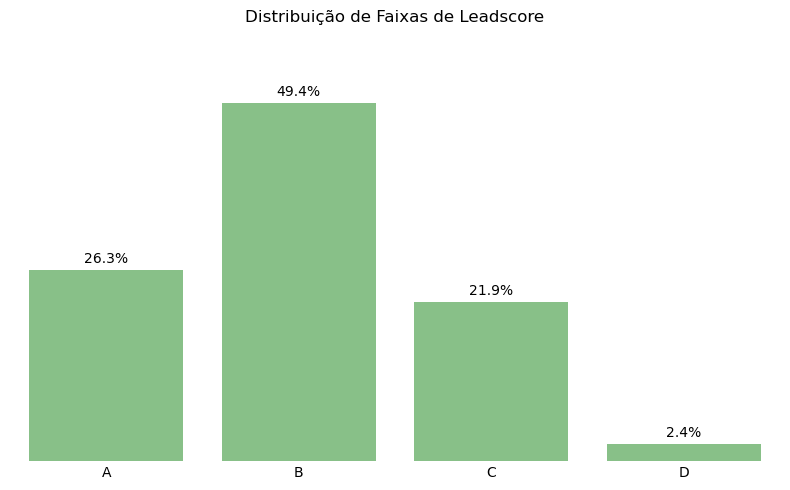

In [9]:
plot_distribuicao_barra(df_pesquisa_alunos_lancamentos)

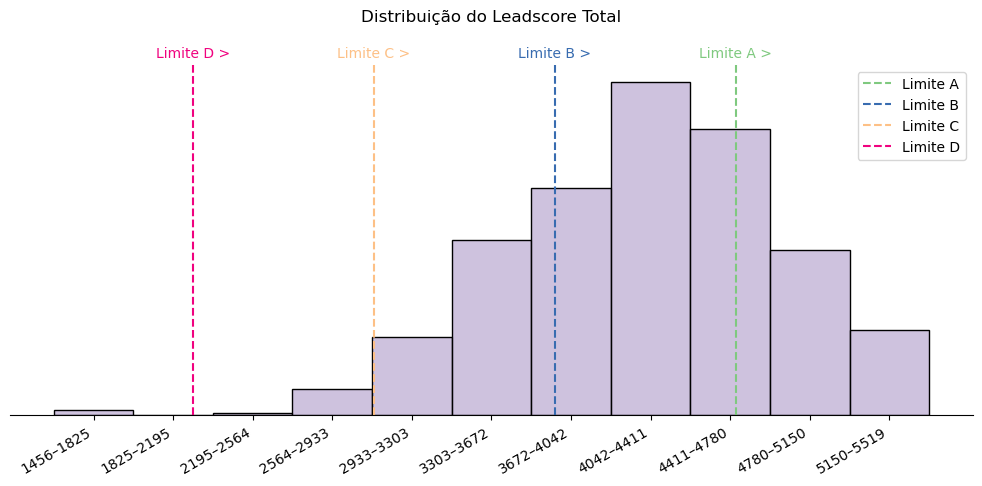

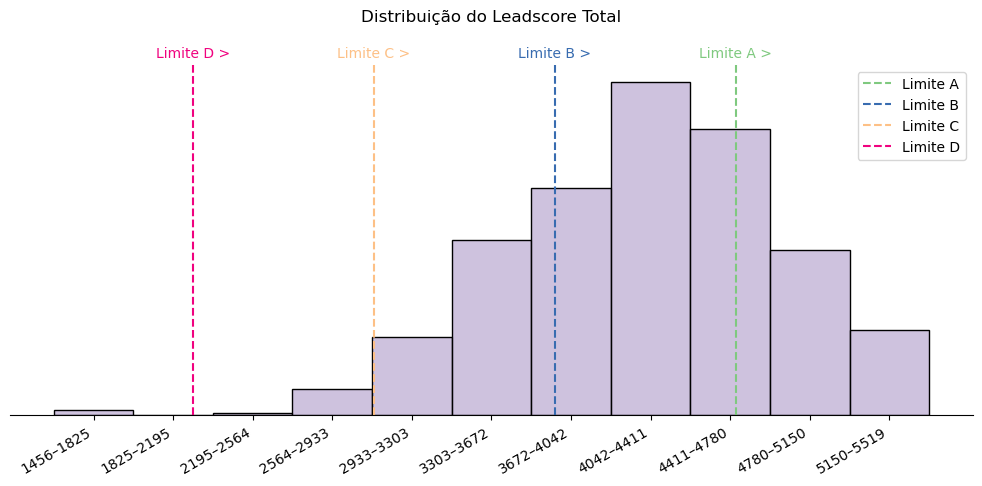

In [10]:
plot_histograma_leadscore_alunos(df_pesquisa_alunos_lancamentos, limite_a, limite_b, limite_c, limite_d)

In [11]:
# Função auxiliar para comparar duas faixas
def comparar_faixas(df, colunas, faixa1, faixa2):
    resultados = []
    for col in colunas:
        dist1 = df[df["leadscore_faixa"] == faixa1][col].value_counts(normalize=True) * 100
        dist2 = df[df["leadscore_faixa"] == faixa2][col].value_counts(normalize=True) * 100
        todas_categorias = set(dist1.index).union(dist2.index)

        for cat in todas_categorias:
            pct1 = dist1.get(cat, 0)
            pct2 = dist2.get(cat, 0)
            diff = round(pct1 - pct2, 2)  # diferença direcionada
            resultados.append({
                "faixa_origem": faixa1,
                "faixa_destino": faixa2,
                "variavel": col,
                "categoria": cat,
                f"% {faixa1}": round(pct1, 2),
                f"% {faixa2}": round(pct2, 2),
                f"diferença entre {faixa1} e {faixa2}": diff
            })
    
    return pd.DataFrame(resultados).sort_values(by=f"diferença entre {faixa1} e {faixa2}", key=abs, ascending=False)

# Comparações entre faixas consecutivas
comparacao_ab = comparar_faixas(df_pesquisa_alunos_lancamentos, cols_to_analyze, "A", "B")
comparacao_bc = comparar_faixas(df_pesquisa_alunos_lancamentos, cols_to_analyze, "B", "C")
comparacao_cd = comparar_faixas(df_pesquisa_alunos_lancamentos, cols_to_analyze, "C", "D")

# Visualizar os top 15 diferenciais de cada comparação
print("🟢 A → B")
display(comparacao_ab.head(20))

print("🟡 B → C")
display(comparacao_bc.head(20))

print("🔴 C → D")
display(comparacao_cd.head(20))

🟢 A → B


,faixa_origem,faixa_destino,variavel,categoria,% A,% B,diferença entre A e B
12,A,B,escolaridade_categoria,Pós-graduação completa,66.88,38.75,28.13
58,A,B,fala_outro_idioma_categoria,Não Fala Outro Idioma,93.51,68.17,25.34
0,A,B,genero,Feminino,96.10,73.70,22.40
1,A,B,genero,Masculino,3.90,26.30,-22.40
59,A,B,fala_outro_idioma_categoria,Inglês Intermediário ou Avançado,6.49,27.68,-21.19
56,A,B,nivel_idioma,Iniciante,78.57,57.44,21.13
17,A,B,renda_media,De 2.500 a 5.000,46.10,26.64,19.46
7,A,B,escolaridade_categoria,Médio completo,1.30,16.26,-14.96
75,A,B,motivo_fluencia_espanhol_categoria,Quero viajar e viver experiências marcantes me...,53.25,39.79,13.45
14,A,B,renda_media,Mais de 10.000,5.19,18.34,-13.14


🟡 B → C


,faixa_origem,faixa_destino,variavel,categoria,% B,% C,diferença entre B e C
0,B,C,genero,Feminino,73.70,40.62,33.08
1,B,C,genero,Masculino,26.30,59.38,-33.08
57,B,C,nivel_idioma,Iniciante,57.44,31.25,26.19
59,B,C,fala_outro_idioma_categoria,Não Fala Outro Idioma,68.17,42.19,25.98
12,B,C,escolaridade_categoria,Pós-graduação completa,38.75,18.75,20.00
60,B,C,fala_outro_idioma_categoria,Inglês Intermediário ou Avançado,27.68,46.88,-19.19
55,B,C,nivel_idioma,Intermediário,23.88,42.97,-19.09
18,B,C,renda_media,De 2.500 a 5.000,26.64,10.16,16.49
76,B,C,motivo_fluencia_espanhol_categoria,Quero viajar e viver experiências marcantes me...,39.79,24.22,15.57
3,B,C,faixa_etaria,18 - 24,4.15,17.19,-13.04


🔴 C → D


,faixa_origem,faixa_destino,variavel,categoria,% C,% D,diferença entre C e D
57,C,D,fala_outro_idioma_categoria,Não Fala Outro Idioma,42.19,14.29,27.90
3,C,D,faixa_etaria,18 - 24,17.19,42.86,-25.67
54,C,D,nivel_idioma,Perdido,25.00,50.00,-25.00
17,C,D,renda_media,Não tenho renda.,13.28,35.71,-22.43
9,C,D,escolaridade_categoria,Médio completo,23.44,42.86,-19.42
12,C,D,escolaridade_categoria,Pós-graduação completa,18.75,0.00,18.75
14,C,D,renda_media,Até 1.500,17.97,35.71,-17.75
37,C,D,profissao_categoria,Estudante,10.94,28.57,-17.63
55,C,D,nivel_idioma,Iniciante,31.25,14.29,16.96
38,C,D,profissao_categoria,Administrativo,15.62,0.00,15.62


In [12]:
# Criar estrutura para armazenar os resultados
resumo_faixas = []

for var in cols_to_analyze:
    # Tabela cruzada de faixa por categoria (percentual por faixa)
    dist = pd.crosstab(df_pesquisa_alunos_lancamentos["leadscore_faixa"],
                       df_pesquisa_alunos_lancamentos[var],
                       normalize='index') * 100

    dist = dist.round(2)

    # Organiza no formato long (faixa, categoria, percentual)
    for faixa in dist.index:
        for categoria in dist.columns:
            resumo_faixas.append({
                "faixa": faixa,
                "variavel": var,
                "categoria": categoria,
                "percentual (%)": dist.loc[faixa, categoria]
            })

# 🔹 Criar DataFrame final
df_resumo_faixas = pd.DataFrame(resumo_faixas).sort_values(by=["variavel", "faixa", "percentual (%)"], ascending=[True, True, False])

# Pivotar para ter faixas A/B/C/D como colunas
df_resumo_pivot = df_resumo_faixas.pivot_table(
    index=["variavel", "categoria"],
    columns="faixa",
    values="percentual (%)"
).reset_index()

# Ordenar colunas (só por garantia)
df_resumo_pivot = df_resumo_pivot[["variavel", "categoria", "A", "B", "C", "D"]]

# Ordenar por variável e dentro de cada variável pelo valor da coluna A (desc)
df_resumo_pivot = df_resumo_pivot.sort_values(
    by=["variavel", "A"],
    ascending=[True, False]
)

# Exibir
pd.set_option('display.max_rows', None)
display(df_resumo_pivot)

faixa,variavel,categoria,A,B,C,D
3,escolaridade_categoria,Pós-graduação completa,66.88,38.75,18.75,0.00
4,escolaridade_categoria,Superior completo,25.32,30.80,32.81,21.43
5,escolaridade_categoria,Superior incompleto,6.49,11.76,19.53,28.57
1,escolaridade_categoria,Médio completo,1.30,16.26,23.44,42.86
0,escolaridade_categoria,Fundamental completo,0.00,0.35,1.56,0.00
2,escolaridade_categoria,Médio incompleto,0.00,2.08,3.91,7.14
9,faixa_etaria,25 - 34,34.42,30.45,30.47,28.57
10,faixa_etaria,35 - 44,32.47,30.80,19.53,14.29
11,faixa_etaria,44 - 55,22.08,21.80,20.31,14.29
6,faixa_etaria,+55,10.39,12.80,11.72,0.00


In [13]:
# ENCODER
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
encoded = encoder.fit_transform(df_pesquisa_alunos_lancamentos[cols_to_analyze])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(cols_to_analyze))

# COMBINA OS DADOS
X_cluster = pd.concat([
    df_pesquisa_alunos_lancamentos["leadscore_total"].reset_index(drop=True),
    encoded_df.reset_index(drop=True)
], axis=1)

# KMEANS
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_pesquisa_alunos_lancamentos["cluster_kmeans"] = kmeans.fit_predict(X_cluster)

C:\Users\Camilo_Bica\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [14]:
exibir_perfis_clusters(df_pesquisa_alunos_lancamentos)

variavel,valor
leadscore_total (média),5018.66
genero,Feminino (98.4%)Masculino (1.6%)
faixa_etaria,25 - 34 (32.3%)35 - 44 (31.5%)44 - 55 (25.2%)
escolaridade_categoria,Pós-graduação completa (69.3%)Superior completo (25.2%)Superior incompleto (4.7%)
renda_media,De 2.500 a 5.000 (47.2%)De 5.000 a 10.000 (29.1%)De 1.500 a 2.500 (17.3%)
tempo_antes_portal,Entre 1 e 3 meses (35.4%)Evento Gratuito (30.7%)Entre 3 meses e 1 ano (22.0%)
onde_acompanha_conteudo,Instagram (50.4%)YouTube (44.1%)Não acompanhava (5.5%)
nivel_idioma,Iniciante (82.7%)Intermediário (11.8%)Perdido (5.5%)
problema_aprender_categoria,Falta de método (34.6%)Não sei por onde começar (22.8%)Falta de disciplina / foco (15.0%)
profissao_categoria,Administrativo (28.3%)Docência (18.1%)Saúde (10.2%)


variavel,valor
leadscore_total (média),3863.34
genero,Feminino (59.9%)Masculino (40.1%)
faixa_etaria,25 - 34 (32.7%)35 - 44 (23.5%)44 - 55 (22.8%)
escolaridade_categoria,Pós-graduação completa (34.0%)Superior completo (26.5%)Médio completo (22.2%)
renda_media,Mais de 10.000 (22.2%)De 1.500 a 2.500 (20.4%)De 2.500 a 5.000 (19.1%)
tempo_antes_portal,Evento Gratuito (40.1%)Entre 1 e 3 meses (27.8%)Entre 3 meses e 1 ano (20.4%)
onde_acompanha_conteudo,YouTube (42.0%)Instagram (35.8%)Não acompanhava (22.2%)
nivel_idioma,Iniciante (45.7%)Intermediário (30.9%)Perdido (22.8%)
problema_aprender_categoria,Não sei por onde começar (27.8%)Falta de método (22.8%)Falta de disciplina / foco (17.9%)
profissao_categoria,Administrativo (19.8%)Docência (10.5%)Técnico Operacional (8.6%)


variavel,valor
leadscore_total (média),4406.52
genero,Feminino (82.0%)Masculino (18.0%)
faixa_etaria,35 - 44 (32.7%)25 - 34 (30.2%)44 - 55 (20.5%)
escolaridade_categoria,Pós-graduação completa (41.5%)Superior completo (31.7%)Superior incompleto (13.2%)
renda_media,De 2.500 a 5.000 (30.2%)De 5.000 a 10.000 (26.8%)De 1.500 a 2.500 (16.6%)
tempo_antes_portal,Evento Gratuito (38.5%)Entre 1 e 3 meses (26.8%)Entre 3 meses e 1 ano (22.0%)
onde_acompanha_conteudo,Instagram (42.4%)YouTube (39.5%)Não acompanhava (18.0%)
nivel_idioma,Iniciante (62.9%)Intermediário (23.9%)Perdido (12.7%)
problema_aprender_categoria,Não sei por onde começar (26.3%)Falta de método (22.4%)Falta de tempo (20.0%)
profissao_categoria,Saúde (19.5%)Administrativo (17.6%)Docência (7.3%)


variavel,valor
leadscore_total (média),3197.45
genero,Masculino (70.3%)Feminino (29.7%)
faixa_etaria,25 - 34 (30.8%)35 - 44 (23.1%)18 - 24 (20.9%)
escolaridade_categoria,Superior completo (36.3%)Médio completo (26.4%)Superior incompleto (18.7%)
renda_media,Até 1.500 (23.1%)De 5.000 a 10.000 (19.8%)Mais de 10.000 (19.8%)
tempo_antes_portal,Evento Gratuito (36.3%)Entre 1 e 3 meses (28.6%)Entre 3 meses e 1 ano (23.1%)
onde_acompanha_conteudo,YouTube (49.5%)Não acompanhava (26.4%)Instagram (23.1%)
nivel_idioma,Intermediário (40.7%)Perdido (35.2%)Iniciante (23.1%)
problema_aprender_categoria,Não sei por onde começar (27.5%)Falta de disciplina / foco (19.8%)Falta de tempo (18.7%)
profissao_categoria,Administrativo (13.2%)Estudante (13.2%)Técnico Operacional (9.9%)


In [15]:
df_pesquisa_alunos_lancamentos.head()

,data_inscricao,email,data_nascimento,genero,faixa_etaria,escolaridade_categoria,renda_media,como_comprou_portal,tempo_antes_portal,onde_acompanha_conteudo,...,lancamentos,problema_aprender_categoria,profissao_categoria,fala_outro_idioma_categoria,motivo_fluencia_espanhol_categoria,pais_categoria,estado_categoria,leadscore_total,leadscore_faixa,cluster_kmeans
0,2024-05-14,teofilotavares@icloud.com,1983-01-06,Masculino,35 - 44,Pós-graduação completa,Mais de 10.000,Comprei com o meu próprio dinheiro,Entre 1 e 3 meses,YouTube,...,L3-24,Falta de tempo,Saúde,Não Fala Outro Idioma,Quero viajar e viver experiências marcantes me...,Brasil,GO,4556,B,2
1,2024-05-16,leosantanati@outlook.com,1995-07-16,Masculino,25 - 34,Médio completo,De 2.500 a 5.000,Comprei com o meu próprio dinheiro,Evento Gratuito,YouTube,...,L3-24,Falta de disciplina / foco,Empreendedorismo,Não Fala Outro Idioma,Morar no exterior,Brasil,SP,3900,B,1
2,2024-05-16,flaviojatoba@outlook.com,1992-10-28,Masculino,25 - 34,Superior completo,De 2.500 a 5.000,Comprei com o meu próprio dinheiro,Evento Gratuito,Não acompanhava,...,L3-24,Falta de disciplina / foco,Publicidade,Não Fala Outro Idioma,Morar no exterior,Brasil,SP,4010,B,1
3,2024-05-17,alandematos10@hotmail.com,1982-05-08,Masculino,35 - 44,Superior completo,De 1.500 a 2.500,Comprei com o meu próprio dinheiro,Evento Gratuito,YouTube,...,L3-24,Não sei por onde começar,Saúde,Não Fala Outro Idioma,Outros,Brasil,MG,4106,B,1
4,2024-05-17,vanessavirginia2019@gmail.com,1985-06-08,Feminino,35 - 44,Superior completo,Não tenho renda.,Ganhei de presente,Entre 1 e 3 meses,YouTube,...,L3-24,Não sei por onde começar,Vendas,Não Fala Outro Idioma,Morar no exterior,Espanha,Estrangeiro,4573,B,2


In [16]:
# Caminho de destino
caminho_csv = r"C:\Users\Camilo_Bica\data_science\consultoria\portal_vhe\dados\pesquisa_alunos_leadscore.csv"

# Exportar para CSV com separador padrão (vírgula) e sem índice
df_pesquisa_alunos_lancamentos.to_csv(caminho_csv, index=False, encoding='utf-8-sig')